In [1]:
import pandas as pd
pd.set_option("display.max_columns",250)
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import yaml as yaml
import openpyxl
import random

sns.set()
# import openmatrix as omx
# import geopandas
# import pyproj
# import re
# import xlrd
from IPython.display import display, HTML

In [2]:
def add_percentage_to_crosstab(ct):
    total_counts = ct['All'][:-1].sum()
    ct['Percent'] = ct.apply(lambda row: round(100 * row['All'] / total_counts, 2), axis=1)
    ct.loc['Percent'] = ct.apply(lambda col: round(100 * col['All'] / total_counts, 2), axis=0)
    ct.loc['Percent', 'Percent'] = pd.NA
    return ct

In [3]:
def make_percentage_bar_plot(variable, title, xlabel, xlabel_rotation):
    grouped_df = obs_df.groupby(variable)["unlinked_weight_scaled"].agg(sum)
    total_weight = grouped_df.sum()
    grouped_df["percent"] = grouped_df/total_weight*100
    plt.figure(figsize=(10,7))
    grouped_df["percent"].plot.bar()
    plt.xlabel(xlabel, fontsize=16)
    plt.xticks(rotation=xlabel_rotation)
    plt.ylabel("Weighted Percent", fontsize=16)
    plt.title(title, fontsize=16)
    plt.show()
    
def make_percentage_bar_plot_cta(variable, title, xlabel, xlabel_rotation):
    grouped_df = cta_df.groupby(variable)["unlinked_weight_scaled"].agg(sum)
    total_weight = grouped_df.sum()
    grouped_df["percent"] = grouped_df/total_weight*100
    plt.figure(figsize=(10,7))
    grouped_df["percent"].plot.bar()
    plt.xlabel(xlabel, fontsize=16)
    plt.xticks(rotation=xlabel_rotation)
    plt.ylabel("Weighted Percent", fontsize=16)
    plt.title(title, fontsize=16)
    plt.show()
    
def make_percentage_bar_plot_metra(variable, title, xlabel, xlabel_rotation):
    grouped_df = metra_df.groupby(variable)["unlinked_weight_scaled"].agg(sum)
    total_weight = grouped_df.sum()
    grouped_df["percent"] = grouped_df/total_weight*100
    plt.figure(figsize=(10,7))
    grouped_df["percent"].plot.bar()
    plt.xlabel(xlabel, fontsize=16)
    plt.xticks(rotation=xlabel_rotation)
    plt.ylabel("Weighted Percent", fontsize=16)
    plt.title(title, fontsize=16)
    plt.show()

In [4]:

with open(r'N:/Projects/CMAP_Activitysim/cmap_abm/survey_data_prep/cmap_inputs.yml') as file:
    settings = yaml.full_load(file)

metra_path  = os.path.join(settings['data_dir'], 'Metra_2019/2019_Origin-Destination_survey_package/metra_with_autosuff.csv')
cta_path =os.path.join(settings['data_dir'], 'CTA_2017/CTA OD Final Data.xlsx')


metra_df = pd.read_csv(metra_path)
cta_df = pd.read_excel(cta_path, sheet_name = 'Data')

output_path = r"output"


C:\Users\leah.flake\AppData\Local\conda\conda\envs\cmap_abm\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (0,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
print("Total entries in the CTA on board survey:", len(cta_df))
print("Weighted total of entries in the CTA survey:", cta_df['unlinked_weight'].sum())

print("Total entries in the Metra on board survey:", len(metra_df))
print("Weighted total of entries in the Metra survey:", metra_df['ON_Weight'].sum())

Total entries in the CTA on board survey: 69947
Weighted total of entries in the CTA survey: 1339652.681
Total entries in the Metra on board survey: 56475
Weighted total of entries in the Metra survey: 130000.00000000003


# Transit Onboard Survey Data Coding

## Recode relevant variables to match between each dataset

In [6]:

cta_df_orig = cta_df.copy()
metra_df_orig = metra_df.copy()


In [7]:
cta_df = cta_df_orig[['id', 'route_id', 'direction', 'origin_place_type', 'access_mode', 'egress_mode', 
                     'dest_place_type', 'total_transfers', 'reverse_exact', 'reverse',
                    'hh_employed', 'hh_veh', 'hh_size', 'hh_children', 'employ', 'student',
                    'license', 'age', 'gender', 'income', 'race_1', 'race_2', 'race_3', 'race_4', 
                    'race_5', 'race_6', 'trip_purp','o_zone', 'd_zone', 'TOD','unlinked_weight', 'linked_weight']].copy()

metra_df = metra_df_orig[['Serial_ID', 'Mode_Access_Code', 'Mode_Egress_Code', 
                          'Rail_Line', 'Train_Line',
                         'Transfer_From', 'Transfer_To', 'Origin_Code', 
                          'Destination_Code', 'ON_Weight', 'OFF_Weight',
                         'Gender_Code', 'Age_Code', 'Race_single_field',
                         'HH_People', 'HH_Children', 'HH_Employed', 'HH_Income_Code', 'Time', 'autosuff']].copy()



### Boardings by route


Questions:

In [8]:
cta_route_df = cta_df.groupby(['route_id'])['unlinked_weight'].agg(sum).sort_index(level='route_id').to_frame()
cta_route_df['Percent'] = cta_route_df['unlinked_weight'] / cta_route_df['unlinked_weight'].sum() * 100

# print(route_dict.head())
display(HTML(cta_route_df.to_html()))

,unlinked_weight,Percent
route_id,,
1- Bronzeville/Union Station,1641.155000,0.122506
100- Jeffery Manor Express,646.684000,0.048273
103- West 103rd,2338.208000,0.174538
106- East 103rd,1386.054000,0.103464
108- Halsted/95th,1205.497000,0.089986
11- Lincoln,1950.468000,0.145595
111- 111th/King Drive,3402.060000,0.253951
111A- Pullman Shuttle,175.416000,0.013094
112- Vincennes/111th,2057.344000,0.153573


In [9]:
metra_df


,Serial_ID,Mode_Access_Code,Mode_Egress_Code,Rail_Line,Train_Line,Transfer_From,Transfer_To,Origin_Code,Destination_Code,ON_Weight,OFF_Weight,Gender_Code,Age_Code,Race_single_field,HH_People,HH_Children,HH_Employed,HH_Income_Code,Time,autosuff
0,010301390001,1,1,5,1,NaN,NaN,8,2,3.200000,3.196262,1,2,1.0,3.0,1.0,2.0,8,*****,2
1,010302230004,2,1,5,1,NaN,NaN,1,2,1.759494,2.198429,2,2,4.0,2.0,0.0,1.0,6,5:03,2
2,010302230005,1,1,5,1,NaN,NaN,10,2,1.966667,2.198429,1,2,3.0,1.0,0.0,0.0,3,5:12,0
3,010302230011,1,1,5,1,NaN,NaN,1,2,2.714286,1.924528,1,2,3.0,1.0,0.0,1.0,3,5:08,2
4,010302230013,3,12,5,1,NaN,NaN,5,10,3.200000,0.000000,1,2,6.0,22.0,3.0,18.0,1,*****,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56470,50736520053,1,5,5,5,NaN,NaN,1,2,2.148221,2.535545,1,2,1.0,4.0,NaN,2.0,12,7:32,2
56471,110032980232,2,1,11,11,NaN,NaN,1,2,1.722408,2.526677,1,2,4.0,4.0,2.0,2.0,12,7:18,2
56472,110022880339,2,1,11,11,NaN,NaN,1,2,1.257426,2.526677,2,2,1.0,NaN,NaN,NaN,10,6:20,2
56473,122210140815,2,1,12,12,NaN,NaN,1,2,1.665574,2.419389,2,2,3.0,4.0,2.0,2.0,11,6:20,2


In [10]:
metra_route_df = metra_df.groupby(['Train_Line'])['ON_Weight'].agg(sum).sort_index(level='Train_Line').to_frame()
metra_route_df['Percent'] = metra_route_df['ON_Weight'] / metra_route_df['ON_Weight'].sum() * 100

# print(route_dict.head())
display(HTML(metra_route_df.to_html()))

,ON_Weight,Percent
Train_Line,,
1,1539.013456,1.183857
3,0.000000,0.000000
4,1449.523812,1.115018
5,10188.196066,7.837074
6,12888.449191,9.914192
8,4343.606983,3.341236
9,1339.817476,1.030629
10,26918.541097,20.706570
11,13764.452599,10.588040


In [11]:
def code_purpose_cta(value):
    if (value == 'Work'):
        return 'Work'
    elif (value == 'Home'):
        return 'Home'
    elif (value == 'College / University (students only)'):
        return 'University'
    elif (value == 'Airport (passengers only)'):
        return 'Maintenance'
    elif (value == 'Recreation / Sightseeing / Restaurant'):
        return 'Discretionary'
    elif (value == 'Medical Service / Hospital (non-work)'):
        return 'Maintenance'
    elif (value == 'Social Visit / Church/ Personal'):
        return 'Discretionary'
    elif (value == 'Personal business or errands'):
        return 'Maintenance'
#     elif (value == 10):
#         return 'Escort'
    elif (value == 'Shopping'):
        return 'Maintenance'
#     elif (value == 12):
#         return 'Dine out'
    elif (value == 'School K-12 (students only)'):
        return 'K-12 school'
#     elif (value == 14):
#         return 'Hotel'
#     elif (value == 15):
#         return 'Sporting event'
    elif (value == 'Other'):
        return 'Maintenance'


def code_purpose_metra(value):
    if (value == 2):
        return 'Work'
    elif (value == 1):
        return 'Home'
    elif (value == 5):
        return 'University'
    elif (value == 6):
        return 'University'
    elif (value == 4):
        return 'K-12 school'
#     elif (value == 14):
#         return 'Hotel'
#     elif (value == 15):
#         return 'Sporting event'
    elif (value == 3):
        return 'Maintenance'
    elif (value == 8):
        return 'Maintenance'
    else:
        return 'Maintenance'




In [12]:
cta_df['ORIG_PURPOSE'] = cta_df['origin_place_type'].apply(lambda value: code_purpose_cta(value))

cta_df['DEST_PURPOSE'] = cta_df['dest_place_type'].apply(lambda value: code_purpose_cta(value))

metra_df['ORIG_PURPOSE'] = metra_df['Origin_Code'].apply(lambda value: code_purpose_metra(value))

metra_df['DEST_PURPOSE'] = metra_df['Destination_Code'].apply(lambda value: code_purpose_metra(value))

In [13]:
print(cta_df['ORIG_PURPOSE'].value_counts())
print(cta_df['DEST_PURPOSE'].value_counts())
print(metra_df['ORIG_PURPOSE'].value_counts())
print(metra_df['DEST_PURPOSE'].value_counts())


Home             32787
Work             19205
Maintenance       7040
Discretionary     6448
University        3263
K-12 school       1204
Name: ORIG_PURPOSE, dtype: int64
Home             27878
Work             19926
Discretionary     9262
Maintenance       8688
University        3254
K-12 school        939
Name: DEST_PURPOSE, dtype: int64
Home           51820
Maintenance     2631
Work            1739
University       178
K-12 school      107
Name: ORIG_PURPOSE, dtype: int64
Work           49724
Maintenance     4554
University      1126
Home             803
K-12 school      268
Name: DEST_PURPOSE, dtype: int64


### Access mode

* 1 - PNR (driving, carshare)
* 2 - KNR (dropped off, taxi/TNC)
* 3 - Walk (includes bike, scooter, skateboard)

Questions:
* Should taxi be TNC?


In [14]:
# Code access/egress before imputation

def code_access_mode_cta(value):
    if (value in  ['Was dropped off by friend/family in a car', 'Biked on own bike', 
                   'Taxi', 'Divvy bike share', 'Was picked up by friend/family in a car']):
        return 'KNR'
    elif (value == 'Uber, Lyft, etc.'):
        return 'TNR'
    elif (value in ['Drove alone and parked', 'Carpool/vanpool', 'Got in a parked vehicle and drove alone']):
        return 'PNR'
    return 'Walk'


def code_access_mode_metra(value):
    if (value in  [3, 10, 12, 13, 14]):
        return 'KNR'
    if (value == 11):
        return 'TNR'
    elif (value in [2, 4, 5]):
        return 'PNR'
    return 'Walk'


def code_egress_mode_metra(value):
    if (value in  [10, 6, 8, 9]):
        return 'KNR'
    if (value == 7):
        return 'TNR'
    elif (value in [11, 12, 13]):
        return 'PNR'
    return 'Walk'

cta_df['access_mode_survey'] = cta_df['access_mode']
cta_df['egress_mode_survey'] = cta_df['egress_mode']
cta_df['access_mode'] = cta_df['access_mode_survey'].apply(lambda value: code_access_mode_cta(value))
cta_df['egress_mode'] = cta_df['egress_mode_survey'].apply(lambda value: code_access_mode_cta(value))

metra_df['access_mode'] = metra_df['Mode_Access_Code'].apply(lambda value: code_access_mode_metra(value))
metra_df['egress_mode'] = metra_df['Mode_Egress_Code'].apply(lambda value: code_egress_mode_metra(value))


In [15]:
orig_dest_ct = pd.crosstab(cta_df['access_mode'], cta_df['egress_mode'], values=cta_df['unlinked_weight'], aggfunc=sum, margins=True)
orig_dest_ct = add_percentage_to_crosstab(orig_dest_ct)
orig_dest_ct.fillna(0, inplace=True)
orig_dest_ct.applymap(lambda x: round(x,2))


egress_mode,KNR,PNR,TNR,Walk,All,Percent
access_mode,,,,,,
KNR,5220.36,505.39,488.19,36990.42,43204.36,3.23
PNR,647.23,2067.78,157.02,36108.12,38980.14,2.91
TNR,493.94,98.08,713.99,7224.59,8530.60,0.64
Walk,23945.49,16683.32,6731.49,1201577.29,1248937.59,93.23
All,30307.01,19354.57,8090.69,1281900.40,1339652.68,100.00
Percent,2.26,1.44,0.60,95.69,100.00,0.00


In [16]:
orig_dest_ct = pd.crosstab(metra_df['access_mode'], metra_df['egress_mode'], values=metra_df['ON_Weight'], aggfunc=sum, margins=True)
orig_dest_ct = add_percentage_to_crosstab(orig_dest_ct)
orig_dest_ct.fillna(0, inplace=True)
orig_dest_ct.applymap(lambda x: round(x,2))



egress_mode,KNR,PNR,TNR,Walk,All,Percent
access_mode,,,,,,
KNR,1404.33,178.90,408.21,17904.53,19895.97,15.30
PNR,1493.45,666.64,388.66,68026.58,70575.33,54.29
TNR,179.77,34.58,210.82,852.43,1277.61,0.98
Walk,1171.51,795.70,484.21,35799.67,38251.09,29.42
All,4249.06,1675.82,1491.91,122583.21,130000.00,100.00
Percent,3.27,1.29,1.15,94.29,100.00,0.00


### Auto Sufficiency
* 0 for households with no autos
* 1 for households that have 0 < autos < number of workers
* 2 for households that have 0 < autos >= number of workers

Questions:
* Auto suff for Metra was imputed in R based on CMAP data
  * Mainly resulted in auto suff "vehicles greater than or equal to workers"
  * Does that make sense for commuter rail?
* Some missing hh employed or hh veh in CTA

In [17]:
cta_df['auto_suff'] = -1

cta_df['hh_veh_survey'] = cta_df.hh_veh
cta_df['hh_employed_survey'] = cta_df.hh_employed


In [18]:

cta_df.loc[cta_df.hh_veh_survey == 'None','hh_veh'] = 0
cta_df.loc[cta_df.hh_veh_survey == '10 or more','hh_veh'] = 10
cta_df['hh_veh'] = pd.to_numeric(cta_df['hh_veh'])
cta_df.loc[cta_df.hh_employed_survey == 'None','hh_employed'] = 0
cta_df.loc[cta_df.hh_employed_survey == '10 or more','hh_employed'] = 10
cta_df['hh_employed'] = pd.to_numeric(cta_df['hh_employed'])
cta_df.loc[cta_df.hh_veh < cta_df.hh_employed, 'auto_suff'] = 1
cta_df.loc[cta_df.hh_veh >= cta_df.hh_employed, 'auto_suff'] = 2
cta_df.loc[cta_df.hh_veh == 0, 'auto_suff'] = 0

metra_df['auto_suff'] = metra_df['autosuff']

In [19]:
print(cta_df['auto_suff'].value_counts(normalize = True))
print(cta_df[cta_df['auto_suff'] >=0]['auto_suff'].value_counts(normalize = True))
print(cta_df['hh_veh'].value_counts())
print(cta_df['hh_employed'].value_counts())



# cta_df.loc[cta_df.auto_suff <0]

 2    0.445423
 0    0.294266
 1    0.259925
-1    0.000386
Name: auto_suff, dtype: float64
2    0.445595
0    0.294379
1    0.260026
Name: auto_suff, dtype: float64
1.0     27548
0.0     20583
2.0     15364
3.0      4475
4.0      1443
5.0       325
6.0       117
7.0        25
8.0        24
10.0       24
9.0         4
Name: hh_veh, dtype: int64
2.0     27367
1.0     25252
3.0      7749
0.0      5911
4.0      2649
5.0       684
6.0       168
10.0       53
7.0        50
8.0        34
9.0         9
Name: hh_employed, dtype: int64


In [20]:
# impute CTA autosuff based on overall distribution

# 0    0.294379
# 1    0.260026
# 2    0.445595
random.seed(413)

m = cta_df[cta_df['auto_suff']<0].shape[0]

s = np.random.choice([0, 1, 2],
                     p=[0.294379, 0.260026, 0.445595], 
                     size = m)
print(s)

cta_df.loc[cta_df['auto_suff'] < 0, 'auto_suff'] = s

[1 2 0 2 2 1 0 1 2 0 1 1 0 1 1 2 0 0 2 2 2 2 2 2 0 0 2]


In [21]:
metra_df['unlinked_weight'] = metra_df['ON_Weight']
metra_df['study'] = 'metra'
cta_df['study'] = 'cta'

In [22]:
# metra_df['linked_weight']


metra_df['num_transfers'] = 0
metra_df.loc[(metra_df.Transfer_From.notnull()) | (metra_df.Mode_Access_Code == 9), 'num_transfers'] = 1 
metra_df.loc[(metra_df.Transfer_To.notnull()) | (metra_df.Mode_Egress_Code == 14), 'num_transfers'] = 1 + metra_df['num_transfers']

print(metra_df.num_transfers.value_counts())

metra_df['linked_weight'] = metra_df['unlinked_weight']/(metra_df['num_transfers'] + 1)

0    56119
1      354
2        2
Name: num_transfers, dtype: int64


In [23]:
# Scale to boardings in oct 2018
pd.set_option('display.max_rows', 130)

metra_boardings = 267772 # close to 130,000 * 2
cta_bus_boardings = 845343
cta_rail_boardings = 485943

print(metra_df.unlinked_weight.sum())
print(cta_df.unlinked_weight.sum())
# print(cta_df.route_id.value_counts())

print(cta_df[cta_df.route_id.str.contains('Line')].unlinked_weight.sum())
print(cta_df[~(cta_df.route_id.str.contains('Line'))].unlinked_weight.sum())


cta_df.loc[cta_df.route_id.str.contains('Line'), 'unlinked_weight_scaled'] = cta_df.loc[cta_df.route_id.str.contains('Line'), 'unlinked_weight'] * 485943/571173.0 
cta_df.loc[~cta_df.route_id.str.contains('Line'), 'unlinked_weight_scaled'] = cta_df.loc[~cta_df.route_id.str.contains('Line'), 'unlinked_weight'] * 845343/768479.6810000001
metra_df['unlinked_weight_scaled']  = metra_df['unlinked_weight'] * (267772/2)/130000.00000000003

print('scaled weights')
print(metra_df.unlinked_weight_scaled.sum())
print(cta_df.unlinked_weight_scaled.sum())
# print(cta_df.route_id.value_counts())

print(cta_df[cta_df.route_id.str.contains('Line')].unlinked_weight_scaled.sum())
print(cta_df[~(cta_df.route_id.str.contains('Line'))].unlinked_weight_scaled.sum())

cta_df['total_transfers_updated'] = cta_df['total_transfers']
cta_df.loc[cta_df.total_transfers == 'None', 'total_transfers_updated'] = 0
cta_df['total_transfers_updated'] = pd.to_numeric(cta_df['total_transfers_updated'])
cta_df['linked_weight_scaled'] = cta_df['unlinked_weight_scaled']/(cta_df['total_transfers_updated'] +1)
metra_df['linked_weight_scaled'] = metra_df['unlinked_weight_scaled']/(metra_df['num_transfers'] +1)


130000.00000000003
1339652.681
571173.0
768479.6810000001
scaled weights
133886.0
1331286.0
485943.0
845342.9999999998


#### Impute tour purposes for non-work tours:

Impute work tours/sub-tours and joint tour purposes where applicable using time of day.

* Impute work tours from maintenance/discretionary tours 
* Impute work sub-tours where neither end is home
* Impute joint tours from maintenance/discretionary tours that remain

Metra is only first half of the day, so have to do it on regular metra dataset before combining



In [24]:
cta_df.TOD.value_counts()
# metra_df.Time.value_counts()

3:01 pm - 7:00 pm     24660
9:01 am - 3:00 pm     17449
6:01 am - 9:00 am     15937
7:01 pm - 10:00 pm     9627
10:01 pm - 3:30 am     1850
3:31 am - 6:00 am       424
Name: TOD, dtype: int64

In [25]:
# derive survey TOD

metra_df['surveyed_hour'] = metra_df['Time'].str.split(':').str[0]
metra_df['surveyed_hour'] = pd.to_numeric(metra_df['surveyed_hour'], errors = 'coerce')
metra_df['TOD'] = ''
metra_df.loc[(metra_df.surveyed_hour >= 9) & (metra_df.surveyed_hour <15), 'TOD'] = '9:01 am - 3:00 pm'
metra_df.loc[(metra_df.surveyed_hour >= 15) & (metra_df.surveyed_hour <19),'TOD'] = '3:01 pm - 7:00 pm'
metra_df.loc[(metra_df.surveyed_hour >= 19) & (metra_df.surveyed_hour <22),'TOD'] = '7:01 pm - 10:00 pm'
metra_df.loc[(metra_df.surveyed_hour >= 6) & (metra_df.surveyed_hour <9),'TOD'] = '6:01 am - 9:00 am'
metra_df.loc[(metra_df.surveyed_hour <3) | (metra_df.surveyed_hour >20),'TOD'] = '10:01 pm - 3:30 am'
metra_df.loc[(metra_df.surveyed_hour >=3) & (metra_df.surveyed_hour <6),'TOD'] = '3:31 am - 6:00 am'

metra_df[metra_df.TOD != ''].TOD.value_counts(normalize = True)


6:01 am - 9:00 am     0.850471
3:31 am - 6:00 am     0.085766
9:01 am - 3:00 pm     0.061830
3:01 pm - 7:00 pm     0.000803
7:01 pm - 10:00 pm    0.000712
10:01 pm - 3:30 am    0.000420
Name: TOD, dtype: float64

In [26]:
# impute TOD where missing


m = metra_df[metra_df.TOD == ''].shape[0]

s = np.random.choice(['3:31 am - 6:00 am', '6:01 am - 9:00 am', '9:01 am - 3:00 pm', '3:01 pm - 7:00 pm',  
                      '7:01 pm - 10:00 pm', '10:01 pm - 3:30 am'],
                     p=[0.085766, 0.850471,  0.061830, 0.000803, 0.00071,  0.000420], 
                     size = m)
print(s)
len(s)

metra_df.loc[metra_df.TOD == '', 'TOD'] = s

metra_df.TOD.value_counts(normalize = True)


['6:01 am - 9:00 am' '6:01 am - 9:00 am' '6:01 am - 9:00 am' ...
 '3:31 am - 6:00 am' '9:01 am - 3:00 pm' '6:01 am - 9:00 am']


6:01 am - 9:00 am     0.850500
3:31 am - 6:00 am     0.085737
9:01 am - 3:00 pm     0.061850
3:01 pm - 7:00 pm     0.000779
7:01 pm - 10:00 pm    0.000708
10:01 pm - 3:30 am    0.000425
Name: TOD, dtype: float64

In [27]:
# combine first half metra with CTA

obs_df = pd.concat([cta_df, metra_df])

# obs_df[pd.isnull(obs_df.HH_Employed)].shape[0]

### Tour Purpose

* Work (home-based-work or work-based tour)
* School
* Other - use a hierarchy


In [28]:
purpose_ct = pd.crosstab(
    obs_df['ORIG_PURPOSE'],
    obs_df['DEST_PURPOSE'],
    values=obs_df['unlinked_weight_scaled'],
    aggfunc=sum,
    normalize='all',
    margins=True)*100
# purpose_ct = add_percentage_to_crosstab(purpose_ct)
# purpose_ct.fillna(0, inplace=True)
purpose_ct.applymap(lambda x: round(x,2))

DEST_PURPOSE,Discretionary,Home,K-12 school,Maintenance,University,Work,All
ORIG_PURPOSE,,,,,,,
Discretionary,0.91,2.66,0.01,0.54,0.06,0.33,4.51
Home,6.82,0.38,1.89,8.31,3.51,35.51,56.42
K-12 school,0.10,2.47,0.14,0.11,0.03,0.11,2.96
Maintenance,0.62,5.50,0.04,1.39,0.13,0.77,8.45
University,0.55,2.54,0.00,0.39,0.44,0.25,4.17
Work,1.54,18.50,0.06,1.64,0.19,1.55,23.48
All,10.55,32.03,2.14,12.39,4.37,38.52,100.00


In [29]:
def determine_tour_purpose(orig_purpose, dest_purpose):
    if (orig_purpose == 'Work') & (dest_purpose == 'Work'):
        return 'Work sub-tour'
    if (orig_purpose == 'Work') | (dest_purpose == 'Work'):
        return 'Work'
    if (orig_purpose == 'Other work') | (dest_purpose == 'Other work'):
        return 'Maintenance' # edit to other maintenance
    if (orig_purpose == 'University') | (dest_purpose == 'University'):
        return 'University'
    if (orig_purpose == 'K-12 school') | (dest_purpose == 'K-12 school'):
        return 'School'
    if (orig_purpose == 'Maintenance') | (dest_purpose == 'Maintenance'):
        return 'Maintenance'
    if (orig_purpose == 'Discretionary') | (dest_purpose == 'Discretionary'):
        return 'Discretionary'
    if (orig_purpose == 'Home') & (dest_purpose != 'Home'):
        return dest_purpose
    if (orig_purpose != 'Home') & (dest_purpose == 'Home'):
        return orig_purpose
    if (orig_purpose == 'Home') & (dest_purpose == 'Home'):
        return 'Discretionary'
    if orig_purpose == dest_purpose:
        return orig_purpose
    return dest_purpose

obs_df['TOUR_PURPOSE'] = obs_df.apply(lambda row: determine_tour_purpose(row['ORIG_PURPOSE'], row['DEST_PURPOSE']), axis=1)

# home-home as other discrectionary
# Social/visiting vs. other discretionary
# Recreation & sporting in "other discretionary"


In [30]:
# use trip weights instead
obs_df['TOUR_PURPOSE'].value_counts(dropna=False)
obs_df.groupby(['TOUR_PURPOSE'])['linked_weight_scaled'].agg(sum).sort_index(level='TOUR_PURPOSE')


TOUR_PURPOSE
Discretionary    120226.577872
Maintenance      179121.818643
School            48863.568884
University        82596.957919
Work             668646.226311
Work sub-tour     18107.554256
Name: linked_weight_scaled, dtype: float64

In [31]:
obs_df.groupby(['TOUR_PURPOSE','study'])['unlinked_weight'].agg(sum).sort_index(level='TOUR_PURPOSE')

TOUR_PURPOSE   study
Discretionary  cta      159582.462888
               metra       441.762296
Maintenance    cta      226323.378862
               metra     10058.681432
School         cta       64968.843944
               metra       676.047777
University     cta      109550.591775
               metra      2701.046287
Work           cta      759064.915575
               metra    113192.210039
Work sub-tour  cta       20162.487956
               metra      2930.252169
Name: unlinked_weight, dtype: float64

In [32]:
# access/egress individually coded earlier
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# code access based on both access/egress
def determine_tour_mode(row):
    if (row['access_mode'] == 'PNR') | (row['egress_mode'] == 'PNR'):
        return 'PNR'
    if (row['access_mode'] == 'TNR') | (row['egress_mode'] == 'TNR'):
        return 'TNR'
    if (row['access_mode'] == 'KNR') | (row['egress_mode'] == 'KNR'):
        return 'KNR'
    return 'Walk'

obs_df['TOUR_MODE'] = obs_df.apply(lambda row: determine_tour_mode(row), axis=1)
access_df = obs_df.groupby(['TOUR_MODE'])['unlinked_weight_scaled'].agg(sum).sort_index(level='TOUR_MODE').to_frame()
access_df['Percent'] = access_df['unlinked_weight_scaled'] / access_df['unlinked_weight_scaled'].sum() * 100



print(access_df)

obs_df.groupby(['TOUR_MODE','study'])['unlinked_weight_scaled'].agg(sum).sort_index(level='TOUR_MODE')

           unlinked_weight_scaled  Percent
TOUR_MODE                                 
KNR                     84436.061    5.763
PNR                    124449.869    8.494
TNR                     17304.447    1.181
Walk                  1238981.624   84.562


TOUR_MODE  study
KNR        cta       63343.484
           metra     21092.576
PNR        cta       50725.536
           metra     73724.333
TNR        cta       15105.162
           metra      2199.285
Walk       cta     1202111.817
           metra     36869.806
Name: unlinked_weight_scaled, dtype: float64

In [33]:
# Impute work tour purpose
# Limit to workers, tour purpose is maintenance/discretionary
# limit to weekdays? need to ask -- Day_Type_2 == 1

obs_df['TOUR_PURPOSE_INIT'] = obs_df['TOUR_PURPOSE']
obs_df['imputed_tour_purpose'] = ''

# calculate utility work tour based on model coefficients
obs_df['uWTP'] = -0.169

# original tour purpose
obs_df.loc[(obs_df['TOUR_PURPOSE_INIT'] == 'Discretionary'), 'uWTP'] = obs_df[obs_df['TOUR_PURPOSE_INIT'] == 'Discretionary']['uWTP'] + (-0.961)


# surveyed hour
obs_df.loc[(obs_df['TOD'] == '9:01 am - 3:00 pm'), 'uWTP'] = obs_df[(obs_df['TOD'] == '9:01 am - 3:00 pm')]['uWTP'] + (-1.38)
obs_df.loc[(obs_df['TOD'] == '3:01 pm - 7:00 pm'), 'uWTP'] = obs_df[(obs_df['TOD'] == '3:01 pm - 7:00 pm')]['uWTP'] + (-0.286)
obs_df.loc[(obs_df['TOD'] == '7:01 pm - 10:00 pm'), 'uWTP'] = obs_df[(obs_df['TOD'] == '7:01 pm - 10:00 pm')]['uWTP'] + (-0.909)

# access mode
obs_df.loc[(obs_df['TOUR_MODE'] == 'PNR'), 'uWTP'] = obs_df[(obs_df['TOUR_MODE'] == 'PNR')]['uWTP'] + (2.08) 
obs_df.loc[(obs_df['TOUR_MODE'] == 'KNR') | (obs_df['TOUR_MODE'] == 'TNR'), 'uWTP'] = obs_df[(obs_df['TOUR_MODE'] == 'KNR') | (obs_df['TOUR_MODE'] == 'TNR')]['uWTP'] + (0.952) 

# calculate probability
obs_df['expuWTP'] = np.exp(obs_df['uWTP'])
obs_df['probWTP'] = obs_df['expuWTP']/(1 + obs_df['expuWTP'])

print(obs_df['probWTP'].value_counts(dropna=False))

# Generate random number
np.random.seed(30)
obs_df['randn'] = np.random.uniform(0, 1, obs_df.shape[0])

obs_df.loc[(obs_df['randn'] < obs_df['probWTP']), 'imputed_tour_purpose'] = 'Work'
obs_df.loc[(obs_df['randn'] >= obs_df['probWTP']), 'imputed_tour_purpose'] = 'replace'


print(np.mean(obs_df['probWTP']))
print(obs_df[obs_df['imputed_tour_purpose'] == 'Work'].shape[0]/
      (obs_df[obs_df['imputed_tour_purpose'] == 'Work'].shape[0] + 
       obs_df[obs_df['imputed_tour_purpose'] == 'replace'].shape[0]))

obs_df.loc[((obs_df['HH_Employed'] > 0) |(obs_df['hh_employed'] > 0)) & 
           (obs_df['imputed_tour_purpose'] == 'Work') & 
           (obs_df['TOUR_PURPOSE_INIT'].isin(['Maintenance', 'Discretionary'])), 'TOUR_PURPOSE'] = obs_df[((obs_df['HH_Employed'] > 0) |(obs_df['hh_employed'] > 0)) & 
               (obs_df['imputed_tour_purpose'] == 'Work') & 
               (obs_df['TOUR_PURPOSE_INIT'].isin(['Maintenance', 'Discretionary']))]['imputed_tour_purpose']

obs_df.groupby(['TOUR_PURPOSE'])['linked_weight'].agg(sum).sort_index(level='TOUR_PURPOSE')



0.871    31730
0.458    28023
0.388    18718
0.175    13741
0.686     9873
0.254     5643
0.195     2969
0.115     2850
0.075     2737
0.630     2187
0.355     1656
0.622     1203
0.835     1169
0.244     1089
0.469      395
0.394      391
0.660      388
0.731      297
0.510      265
0.386      257
0.721      255
0.174      230
0.252      217
0.456      139
Name: probWTP, dtype: int64
0.5126649000464815
0.5136289569853348


TOUR_PURPOSE
Discretionary   104336.038
Maintenance     133944.002
School           45921.932
University       83584.205
Work            744980.150
Work sub-tour    18547.101
Name: linked_weight, dtype: float64

In [34]:
# Derive observed/surveyed hour (as a sub for departure hour)


# # pd.to_datetime(obs_df['StartTime']).head()
# obs_df['surveyed_hour'] = pd.to_datetime(obs_df['StartTime']).dt.hour

# obs_df['surveyed_hour'].value_counts(dropna=False).sort_index(level='surveyed_hour')


In [35]:
# Impute work sub-tour purpose
# Limit to origin/destination not home

# calculate utility work subtour based on model coefficients
obs_df['uWST'] = -7.38

obs_df.loc[(obs_df['ORIG_PURPOSE'] == 'Work') | (obs_df['DEST_PURPOSE'] == 'Work'), 'uWST'] = \
    obs_df[(obs_df['ORIG_PURPOSE'] == 'Work') | (obs_df['DEST_PURPOSE'] == 'Work')]['uWST'] + (3.93)
obs_df.loc[(obs_df['TOD'] == '9:01 am - 3:00 pm'), 'uWST'] = obs_df[(obs_df['TOD'] == '9:01 am - 3:00 pm')]['uWST'] + (3.14)



# calculate probability
obs_df['expuWST'] = np.exp(obs_df['uWST'])
obs_df['probWST'] = obs_df['expuWST']/(1 + obs_df['expuWST'])

print(obs_df['probWST'].value_counts(dropna=False))

# Generate random number
obs_df['randn'] = np.random.uniform(0, 1, obs_df.shape[0])

obs_df.loc[(obs_df['randn'] < obs_df['probWST']), 'imputed_tour_purpose'] = 'Work sub-tour'
obs_df.loc[(obs_df['randn'] >= obs_df['probWST']), 'imputed_tour_purpose'] = 'replace'


print(np.mean(obs_df['probWST']))
print(obs_df[obs_df['imputed_tour_purpose'] == 'Work sub-tour'].shape[0]/
      (obs_df[obs_df['imputed_tour_purpose'] == 'Work sub-tour'].shape[0] + 
       obs_df[obs_df['imputed_tour_purpose'] == 'replace'].shape[0]))

obs_df.loc[(obs_df['imputed_tour_purpose'] == 'Work sub-tour') & 
           (obs_df['ORIG_PURPOSE'] != 'Home') & 
           (obs_df['DEST_PURPOSE'] != 'Home'), 'TOUR_PURPOSE'] = obs_df[(obs_df['imputed_tour_purpose'] == 'Work sub-tour') & 
           (obs_df['ORIG_PURPOSE'] != 'Home') & 
           (obs_df['DEST_PURPOSE'] != 'Home')]['imputed_tour_purpose']

obs_df.groupby(['TOUR_PURPOSE'])['linked_weight'].agg(sum).sort_index(level='TOUR_PURPOSE')



0.031    80308
0.001    25172
0.014    12893
0.423     8049
Name: probWST, dtype: int64
0.0480568443003936
0.04699340304693803


TOUR_PURPOSE
Discretionary   104294.376
Maintenance     133827.520
School           45921.932
University       83514.397
Work            736676.354
Work sub-tour    27078.850
Name: linked_weight, dtype: float64

In [36]:
obs_df.hh_size.value_counts()

obs_df.loc[obs_df.hh_size == '10 or more', 'hh_size'] = 10
obs_df.hh_size = pd.to_numeric(obs_df.hh_size)

In [37]:
# Impute joint tour
# Limit to hhsize >1 and maintenance/discretionary tour purpose (after prev steps)

# calculate utility fully joint tour based on model coefficients
obs_df['uFJT'] = -3.33 

# surveyed hour
obs_df.loc[(obs_df['TOD'] == '9:01 am - 3:00 pm'), 'uFJT'] = obs_df[(obs_df['TOD'] == '9:01 am - 3:00 pm')]['uFJT'] + (0.649)
obs_df.loc[(obs_df['TOD'] == '3:01 pm - 7:00 pm'), 'uFJT'] = obs_df[(obs_df['TOD'] == '3:01 pm - 7:00 pm')]['uFJT'] + (0.957)
obs_df.loc[(obs_df['TOD'] == '7:01 pm - 10:00 pm'), 'uFJT'] = obs_df[(obs_df['TOD'] == '7:01 pm - 10:00 pm')]['uFJT'] + (1.62)

obs_df.loc[(obs_df['TOUR_PURPOSE_INIT'] == 'Discretionary'), 'uFJT'] = obs_df[(obs_df['TOUR_PURPOSE_INIT'] == 'Discretionary')]['uFJT'] + (0.687)
obs_df.loc[(obs_df['TOUR_PURPOSE_INIT'] == 'Maintenance'), 'uFJT'] = obs_df[(obs_df['TOUR_PURPOSE_INIT'] == 'Maintenance')]['uFJT'] + (0.470)

# calculate probability
obs_df['expuFJT'] = np.exp(obs_df['uFJT'])
obs_df['probFJT'] = obs_df['expuFJT']/(1 + obs_df['expuFJT'])

print(obs_df['probFJT'].value_counts(dropna=False))

# Generate random number
obs_df['randn'] = np.random.uniform(0, 1, obs_df.shape[0])

obs_df.loc[(obs_df['randn'] < obs_df['probFJT']), 'joint_tour_type'] = 'Joint'
obs_df.loc[(obs_df['randn'] >= obs_df['probFJT']), 'joint_tour_type'] = 'Ind'


print(np.mean(obs_df['probFJT']))
print(obs_df[obs_df['joint_tour_type'] == 'Joint'].shape[0]/
      (obs_df[obs_df['joint_tour_type'] == 'Joint'].shape[0] + 
       obs_df[obs_df['joint_tour_type'] == 'Ind'].shape[0]))

obs_df.loc[((obs_df['HH_People'] > 1) | (obs_df['hh_size'] > 1)) & # hhsize > 1
           (obs_df['TOUR_PURPOSE'] == 'Discretionary') & 
           (obs_df['joint_tour_type'] == 'Joint'), 'TOUR_PURPOSE'] = 'Joint-Discretionary'

obs_df.loc[(obs_df['TOUR_PURPOSE'] == 'Discretionary'), 'TOUR_PURPOSE'] = 'Ind-Discretionary'

obs_df.loc[((obs_df['HH_People'] > 1) | (obs_df['hh_size'] > 1)) & # hhsize > 1
           (obs_df['TOUR_PURPOSE'] == 'Maintenance') & 
           (obs_df['joint_tour_type'] == 'Joint'), 'TOUR_PURPOSE'] = 'Joint-Maintenance'

obs_df.loc[(obs_df['TOUR_PURPOSE'] == 'Maintenance'), 'TOUR_PURPOSE'] = 'Ind-Maintenance'


obs_df.groupby(['TOUR_PURPOSE'])['linked_weight'].agg(sum).sort_index(level='TOUR_PURPOSE')



0.035    64929
0.085    17524
0.064    10648
0.099     6936
0.054     4697
0.153     4629
0.156     3614
0.130     3566
0.120     3358
0.264     3332
0.224     1706
0.066     1483
Name: probFJT, dtype: int64
0.0700930644256094
0.06973469807470219


TOUR_PURPOSE
Ind-Discretionary      93505.344
Ind-Maintenance       123746.907
Joint-Discretionary    10789.032
Joint-Maintenance      10080.613
School                 45921.932
University             83514.397
Work                  736676.354
Work sub-tour          27078.850
Name: linked_weight, dtype: float64

## Combine with reverse metra data

In [38]:
# Make the return trips for Metra
metra_df_rev = obs_df[obs_df.study == 'metra'].copy()

metra_df_rev['egress_mode_backup'] = metra_df_rev['egress_mode']
metra_df_rev['access_mode_backup'] = metra_df_rev['access_mode']
metra_df_rev['ORIG_PURPOSE_backup'] = metra_df_rev['ORIG_PURPOSE']
metra_df_rev['DEST_PURPOSE_backup'] = metra_df_rev['DEST_PURPOSE']

metra_df_rev['access_mode'] = metra_df_rev['egress_mode_backup']
metra_df_rev['egress_mode'] = metra_df_rev['access_mode_backup']

metra_df_rev['ORIG_PURPOSE'] = metra_df_rev['DEST_PURPOSE_backup']
metra_df_rev['DEST_PURPOSE'] = metra_df_rev['ORIG_PURPOSE_backup']

In [39]:
obs_df_backup = obs_df.copy()


In [40]:
obs_df = pd.concat([obs_df_backup, metra_df_rev])


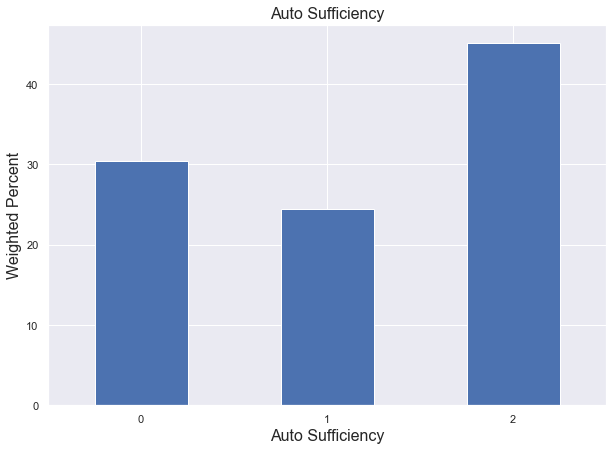

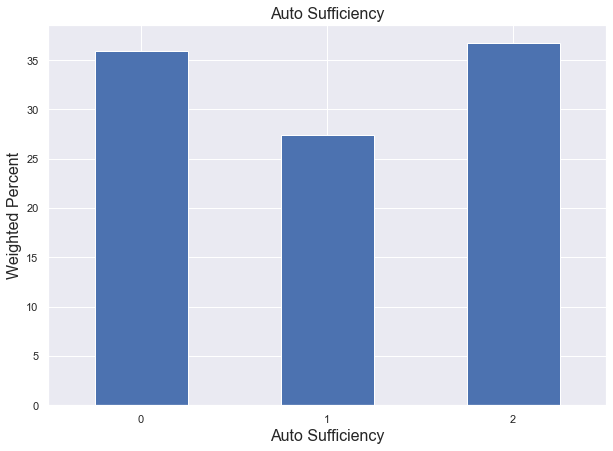

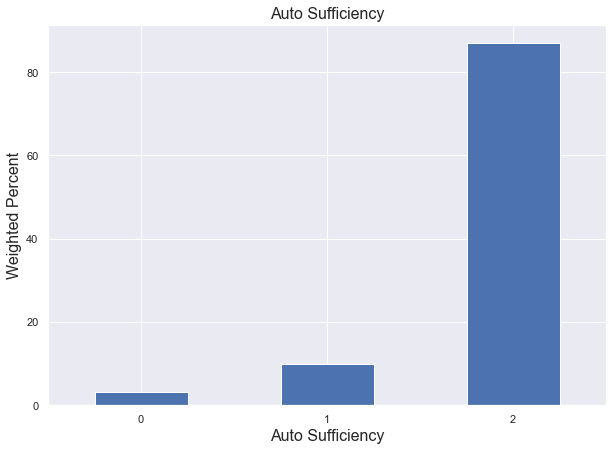

In [41]:
make_percentage_bar_plot(
    variable='auto_suff',
    title="Auto Sufficiency",
    xlabel="Auto Sufficiency",
    xlabel_rotation=0)

make_percentage_bar_plot_cta(
    variable='auto_suff',
    title="Auto Sufficiency",
    xlabel="Auto Sufficiency",
    xlabel_rotation=0)

make_percentage_bar_plot_metra(
    variable='auto_suff',
    title="Auto Sufficiency",
    xlabel="Auto Sufficiency",
    xlabel_rotation=0)

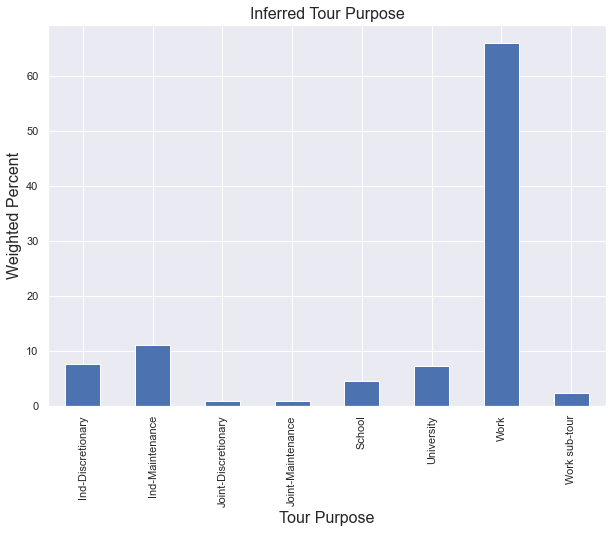

In [42]:
make_percentage_bar_plot(
    variable='TOUR_PURPOSE',
    title="Inferred Tour Purpose",
    xlabel="Tour Purpose",
    xlabel_rotation=90)


In [43]:
obs_df['TOUR_MODE'] = obs_df.apply(lambda row: determine_tour_mode(row), axis=1)
access_df = obs_df.groupby(['TOUR_MODE'])['linked_weight_scaled'].agg(sum).sort_index(level='TOUR_MODE').to_frame()
access_df['Percent'] = access_df['linked_weight_scaled'] / access_df['linked_weight_scaled'].sum() * 100



print(access_df)

obs_df.groupby(['TOUR_MODE','study'])['linked_weight_scaled'].agg(sum).sort_index(level='TOUR_MODE')

           linked_weight_scaled  Percent
TOUR_MODE                               
KNR                   90509.360    7.235
PNR                  189409.347   15.140
TNR                   15413.183    1.232
Walk                 955714.375   76.393


TOUR_MODE  study
KNR        cta      48433.338
           metra    42076.022
PNR        cta      42102.498
           metra   147306.849
TNR        cta      11025.464
           metra     4387.719
Walk       cta     882517.843
           metra    73196.531
Name: linked_weight_scaled, dtype: float64

## Summary tables

### Boardings by line

In [44]:
obs_df['metra_route'] = obs_df['Train_Line']

metra_route_lookup = {
    1:'Electric, South Chicago',
    4:'Electric, Blue Island ',
    5:'Electric, Main Line',
    6:'Rock Island',
    8:'SouthWest Service',
    9:'Heritage Corridor',
    10:'BNSF',
    11:'Union Pacific West',
    12:'Milwaukee West',
    13:'Union Pacific North West',
    15:'Milwaukee North',
    16:'North Central Service',
    17:'Union Pacific North'}

obs_df.replace({"metra_route": metra_route_lookup}, inplace = True)

obs_df['route'] = obs_df.route_id.combine_first(obs_df.metra_route)

obs_df.route.value_counts()

BNSF                        21902
Union Pacific North West    14224
Rock Island                 13350
Red Line                    13147
Union Pacific West          12396
                            ...  
48- South Damen                32
85A- North Central             31
31- 31st                       26
111A- Pullman Shuttle           7
5- South Shore Night Bus        6
Name: route, Length: 143, dtype: int64

In [45]:
mode_df = obs_df.groupby(['TOUR_MODE'])['unlinked_weight_scaled'].agg(sum).sort_index(level='TOUR_MODE').to_frame()
mode_df['Percent'] = mode_df['unlinked_weight_scaled'] / mode_df['unlinked_weight_scaled'].sum() * 100
display(HTML(mode_df.to_html()))

,unlinked_weight_scaled,Percent
TOUR_MODE,,
KNR,105528.637,6.599
PNR,198174.201,12.393
TNR,19503.732,1.220
Walk,1275851.430,79.788


### Linked trips by transit mode + tour purpose

In [46]:
mode_purpose_ct = pd.crosstab(obs_df['TOUR_PURPOSE'], obs_df['TOUR_MODE'], values=obs_df['unlinked_weight_scaled'], aggfunc=sum, margins=True)
mode_purpose_ct = add_percentage_to_crosstab(mode_purpose_ct)
mode_purpose_ct.fillna(0, inplace=True)
mode_purpose_ct.applymap(lambda x: round(x,2))


TOUR_MODE,KNR,PNR,TNR,Walk,All,Percent
TOUR_PURPOSE,,,,,,
Ind-Discretionary,5613.070,3515.210,1849.720,109679.880,120657.870,7.550
Ind-Maintenance,8472.510,4634.430,2670.400,159376.070,175153.420,10.950
Joint-Discretionary,1003.590,312.920,193.990,12493.810,14004.310,0.880
Joint-Maintenance,466.880,239.350,150.200,13555.650,14412.080,0.900
School,6867.420,1052.370,523.320,62093.710,70536.830,4.410
University,6907.620,5524.320,1003.900,101457.530,114893.370,7.190
Work,74241.180,177758.350,12233.470,788859.890,1053092.900,65.860
Work sub-tour,1956.360,5137.250,878.720,28334.890,36307.220,2.270
All,105528.640,198174.200,19503.730,1275851.430,1599058.000,100.000


### Linked trips by tour purpose, auto sufficiency, and access mode

In [47]:
purpose_suff_access_ct = pd.crosstab(obs_df['TOUR_PURPOSE'], [obs_df['auto_suff'], obs_df['access_mode']], values=obs_df['linked_weight'], aggfunc=sum, margins=True)
purpose_suff_access_ct = add_percentage_to_crosstab(purpose_suff_access_ct)
purpose_suff_access_ct.fillna(0, inplace=True)
purpose_suff_access_ct.applymap(lambda x: round(x,2))

auto_suff                  0                                      1            \
access_mode              KNR      PNR      TNR       Walk       KNR       PNR   
TOUR_PURPOSE                                                                    
Ind-Discretionary   1018.640   33.940  119.640  32549.150   892.310   234.600   
Ind-Maintenance     1028.180  140.900  314.520  53237.360   770.640   198.460   
Joint-Discretionary   57.600    0.000    0.000   3231.350   287.150    17.310   
Joint-Maintenance     13.850    3.520    1.820   3745.580    63.680     4.840   
School               190.060    2.600   66.860   6301.510   868.630    71.090   
University           521.110   66.240   58.240  30844.970   776.150   441.890   
Work                4302.460 1873.340 1483.060 201460.180 10123.080  8757.410   
Work sub-tour         83.890  101.050   59.960   8217.070   189.970   424.980   
All                 7215.790 2221.590 2104.080 339587.170 13971.610 10150.590   
Percent                0.570    0.180    0.170     26.930     1.110     0.810   

auto_suff                                       2                     \
access_mode              TNR       Walk       KNR       PNR      TNR   
TOUR_PURPOSE                                                           
Ind-Discretionary    206.730  19925.630  1073.980  2390.790  388.630   
Ind-Maintenance      227.420  20983.410  3055.200  2283.700  596.260   
Joint-Discretionary    0.000   3490.930   239.970   229.960   85.250   
Joint-Maintenance     15.330   2811.100   109.140   105.560   25.600   
School                 1.510  11879.900  2899.020   615.180  175.200   
University            89.930  16529.910  2411.330  2723.860  256.640   
Work                1371.010 187745.040 26092.120 82192.070 3105.470   
Work sub-tour        193.920   5644.820   784.780  2392.380  255.940   
All                 2105.850 269010.750 36665.550 92933.490 4888.990   
Percent                0.170     21.330     2.910     7.370    0.390   

auto_suff                              All Percent  
access_mode               Walk                      
TOUR_PURPOSE                                        
Ind-Discretionary    34986.090   93820.120   7.440  
Ind-Maintenance      47244.160  130080.210  10.320  
Joint-Discretionary   3165.240   10804.770   0.860  
Joint-Maintenance     3420.300   10320.330   0.820  
School               23524.420   46595.980   3.700  
University           31487.100   86207.380   6.840  
Work                324376.870  852882.120  67.640  
Work sub-tour        11863.020   30211.760   2.400  
All                 480067.200 1260922.670 100.000  
Percent                 38.070     100.000   0.000

## Write coded output

In [48]:
obs_df.to_csv(os.path.join(output_path, 'processed_obs.csv'))